In [16]:
from diff_conv_opt.src.my_lib import DiffConv
import cxvpy as cp
import torch
from cvxpylayers.torch import CvxpyLayer



ModuleNotFoundError: No module named 'diff_conv_opt'

In [15]:
#Example with the cvxpylayer
n, m = 2, 3
x = cp.Variable(n)
A = cp.Parameter((m, n))
b = cp.Parameter(m)
constraints = [x >= 0]
objective = cp.Minimize(0.5 * cp.pnorm(A @ x - b, p=1))
problem = cp.Problem(objective, constraints)
assert problem.is_dpp()
cvxpylayer = CvxpyLayer(problem, parameters=[A, b], variables=[x])
A_tch = torch.randn(m, n, requires_grad=True)
b_tch = torch.randn(m, requires_grad=True)
(solution,) = cvxpylayer(A_tch, b_tch)
solution.sum().backward()
print(solution)



tensor([1.0039e-06, 2.7358e-01], grad_fn=<_CvxpyLayerFnFnBackward>)


In [7]:
#Example with DiffConv
n, m = 2, 3
x = cp.Variable(n)
A = cp.Parameter((m, n))
b = cp.Parameter(m)
constraints = [x >= 0]
objective = cp.Minimize(0.5 * cp.pnorm(A @ x - b, p=1))
problem = cp.Problem(objective, constraints)
assert problem.is_dpp()
cvxpylayer2 = DiffConv(problem, parameters=[A, b], variables=[x])
A_tch2 = A_tch
b_tch2 = b_tch
(solution2,) = cvxpylayer2(A_tch2, b_tch2)
solution2.sum().backward()
print(solution2)

**Sigmoid function**

In [11]:

def to_np(x):
    return x.detach().numpy()

Text(0, 0.5, '$f(x)$')

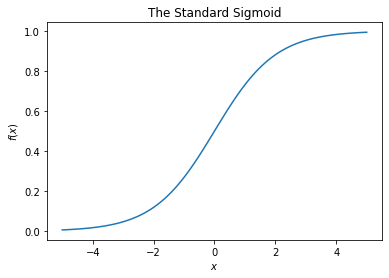

In [12]:



import torch
import matplotlib.pyplot as plt

n = 100
x = torch.linspace(-5, 5, steps=n, requires_grad=True)
y = torch.sigmoid(x)
plt.plot(to_np(x), to_np(y))
plt.title('The Standard Sigmoid')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

In [13]:

import cvxpy as cp
from cvxpylayers.torch import CvxpyLayer
from my_lib import DiffConv

_x = cp.Parameter(n)
_y = cp.Variable(n)
obj = cp.Minimize(-_x.T * _y - cp.sum(cp.entr(_y) + cp.entr(1. - _y)))
prob = cp.Problem(obj)
layer = DiffConv(prob, parameters=[_x], variables=[_y])
x = torch.linspace(-5, 5, steps=n, requires_grad=True)
y, = layer(x)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.title('The Variational Sigmoid')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')


ImportError: cannot import name 'DiffConv' from 'my_lib' (D:\Project\TSE\MathsOfMLDL\Project Implicit Differentiation\diff_conv_opt\src\my_lib.py)

### Reference
<a id="1">[1]</a> [Differntiable Convex Optimization Layers](https://locuslab.github.io/2019-10-28-cvxpylayers/)
<a id="1">[2]</a> [Deep Implicit Layers](http://implicit-layers-tutorial.org/)